### Kenneth Tran
#### CMSC320-0101 Final Tutorial

# Introduction
This is a notebook providing a tutorial on the data science pipeline for the CMSC320 - Introduction to Data Science class. We will be using data on the Titanic and survival statistics in order to demonstrate the process of the pipeline.


# Topic and Motivation

Given a training set of passengers who survived and did not survive on the Titanic, we will be creating a model that can determine if the passengers in the test dataset survived on the Titanic. The motivation is to identify the likelyhoods of survival, as there were several key factors to having a higher likelyhood or survival such as gender, age, and class. With this specific, it is beneficial to data science as a good example of how data science can be applied to real-world scenarios to gain results.

# Scraping Data
Python has a pandas package that helps us better structure our data through datasets. We will be using this package to turn our training and test datasets into pandas dataframes.

In [179]:
import pandas as pd
import numpy as np
import random as ran
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
%matplotlib inline

In [180]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_and_test_df = [train_df, test_df]

### Data Analysis

After acquiring our training and test dataframes, we can use pandas to analyze our data so that we understand the data we want to visualize.

By first using head(), we can see the columns of the dataframe and see the features of the dataset.

In [181]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see all of the column names where:

0 = No
1 = Yes

survival - Survival	
pclass - Ticket class (1st class, 2nd class, 3rd class)
sex	- Sex
Age	- Age in years	
sibsp - # of siblings / spouses aboard the Titanic	
parch - # of parents / children aboard the Titanic	
ticket - Ticket number	
fare - Passenger fare	
cabin - Cabin number	
embarked - Port of Embarkation (S,C,Q)

Now that we know all of the features, we can start to organize the features.

##### Numerical features :

These features are the ones that have values that change throughout each sample. 
Features include - 
    Continuous numerical: Age and Fare
    Discrete numerical: SibSp and Parch
    
##### Categorical features:

These features are the ones that have values that classify all of the samples into sets of similar samples.
Features include - 
    Categorical: Survival, Sex, and Embarked
    Ordinal-based: Pclass
    
##### Mixed Data types:

These features have numerical and alphanumeric data within the same feature.
Features include - Ticket and Cabin

In [182]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can use the describe() function to give us a representation of the current training set compared to the actual set. This can help us determine the distribution of numerical features across all the samples.

Several things that can be noted:
- The total number of passengers in this dataset is to be used as a sample of the total number of actual passengers
- Fares were very diverse, as the max was \$512 and the majority paying around \$14-31.
- The majority of the age range was between 20-40, where there were very few elders on board.

In [183]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


We can use the describe() function with the 'include' parameter to give us a representation of the distribution of categorical features.

Several things that can be noted:
- Every passenger's name is unique
- The majority of passengers embarked from the S port
- There are duplicate values in Ticket, based on unique being 681, leaving 210 duplicate values
- Majority of passengers were male, based on freq being 577


### Assumptions based on intial data analysis

Based on the initial data analysis, there are assumptions that can be made:

- One of our goals is to determine how well each feature correlates with the Survival feature. We can therefore correlate each feature with the Survival feature and then create a model for the correlations later
- We will need to fill in any missing values for the Age and Embarked features, as it is safe to assume that they would correlate with Survival
- The Ticket feature can be overlooked, as we noted that there are a high number of duplicate values in the feature and it is unlikely that Tickets will correlate with Survival
- The Cabin feature can be overlooked, as it contains many missing values that will not be beneficial to our data analysis
- The PassengerId and Name features can be overlooked, as they have no direct correlation to Survival
- Creating a Family, Title, and Fare bracket feature would be beneficial to further organizing our data to help see correlations and trends related to Survival
- Women, children, and Pclass 1 passengers were more likely to survive

### In-depth data analysis of assumptions

In order to confirm several of the prior assumptions mentioned above, we can combine features against each other.

Note - This analysis cannot be done on features that have missing or empty values, so in our case it would only make sense to do the in-depth analysis on the assumptions involving Sex, Pclass, SibSp, and ParCh.

- Sex vs Survival:
    We can see that females had a 74% chance of survival while males had only a 19% chance of survival, confirming out assumption that the female sex had a higher survival rate than the male sex.

In [184]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- Pclass vs Survival: We can see that there is a correlation in the Pclass 1 and it's survival rate, so it can be assumed that the higher your tickt class, the higher chances of survival

In [185]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- SibSp and ParCh vs Survival: Due to the data of SibSp being scattered, it is difficult to determine if there is any direct correlation between SibSp and ParCh against Survival. Since this is the case, we can ignore this

In [186]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [187]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualizing our data

Histograms are very useful when analyzing numerical variables where a set of ranges helps to identify any patterns that may be existing. 

### Correlation of numerical features to survival
There are several assumptions in regards to numerical features that can be cleared up through the use of histograms:
- Passengers that had Age <=4 had a higher survival rate
- The elderly passengers Age >= 80 had a higher survival rate
- The majority of passengers 15-30 had a lower survival rate

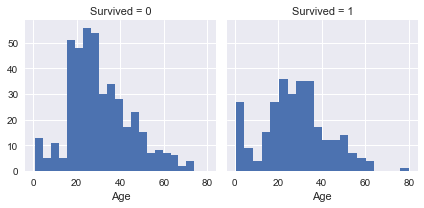

In [188]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

From this histogram, we can see that there is an obvious correlation between Age and Survival, thus confirming that we need to fill in any missing values for the Age feature and use it for our model. Also, because of the wide spread in the feature, it would greatly help to group the Ages into age groups that will help with organizing the data.

### Correlation of numerical and ordinal features to survival

We can combine Age and Pclass to help identify a correlation against survival.

There are several assumptions in regards to numerical and ordinal features that can be cleared up through the use of histograms:

- Pclass of 3 had the highest number of passengers, but the majority of Pclass 3 passengers did not survive
- The majority youngest passengers Age <=4 within Pclass 2 and 3 survived
- The majority of passengers in Pclass 1 survived
- Pclass is correlated with the Age distribution of passengers

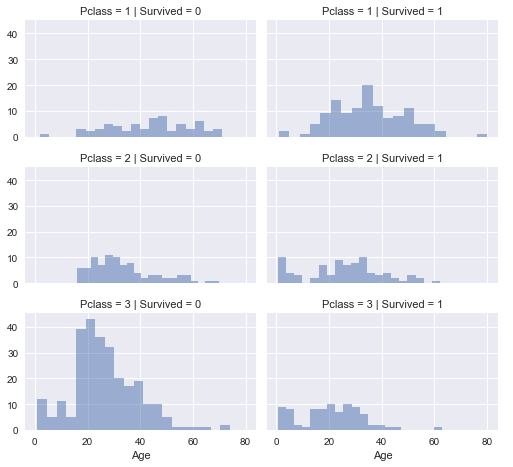

In [189]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

We can see from the histograms that several assumptions can be confirmed:

- Children in general most likely had a higher chance of survival
- The upper-class passengers Pclass of 1 had a higher chance of survival

### Correlation of categorical features to survival

We also want to see the potential correlation between the categorical features such as Sex and Embarked against Survival.

There are several assumptions in regards to categorical features that can be cleared up through the use of histograms:

- Females had a higher rate of survival
- Males had a higher survival rate only if they were in Pclass 3 
- Embarked values had various rates of survival based on Pclass, but specifically for male passengers in Pclass 3

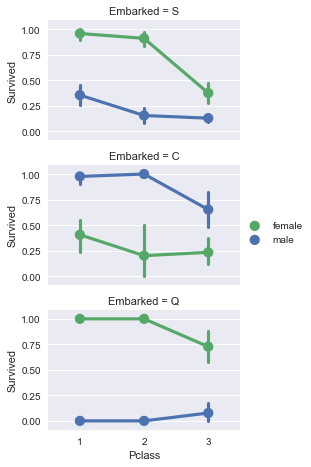

In [190]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

We can see from the histograms that several assumptions can be confirmed:

- Females were more likely to have survived.
- The Age feature should be completed, since it is apparent that there is a direct correlation to survival
- The Embarked feature should be completed so that we can determine if it may have a more direct correlation with survival

### Correlation of categorical and numerical features to survival

Another helpful visualization would be to visualize the correlation of categorical and numerical features with survival. In our case, that would be Embarked, Sex, and Fare against Survival.

There are several assumptions in regards to categorical and numerical features that can be cleared up through the use of histograms:

- Those who paid the higher fare had a higher rate of survival
- The value of Embarked had a correlation with the rate of survival

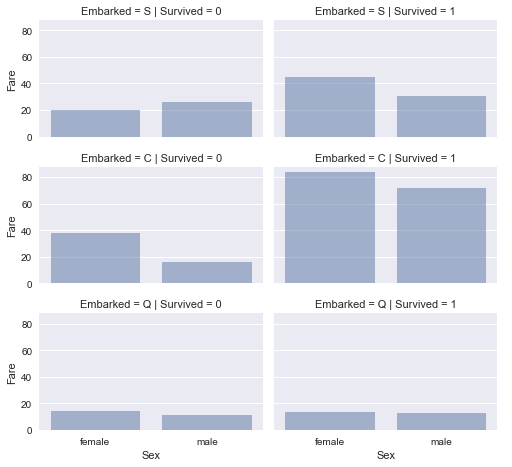

In [191]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

We can see from the histograms that several assumptions can be confirmed:

- Cleaning up the Fare feature will be necessary in order to analyze
- Age is directly correlated with rate of survival
- The Embarked feature should be completed so that we can check for further correlations

# Wrangle and Cleanse data

Now that we have several assumptions that we have confirmed with our datasets, we can begin to correct and create these confirmations using our data.

### Discarding features

We can discard features in oder to deal with fewer data points and simplify our analysis. From prior assumptions, we can discard the Cabin and Ticket features. We want to be sure to discard across both the training set and test set so that both sets remain with the same features.

In [192]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
train_and_test_df = [train_df, test_df]

### Adding features by extracting from current features

As stated before, we can create a 'Title' feature where we can extract all the titles from the names of each passenger and analyze if there is a correlation between title and survival. To do so, we can use a regular expression to catch the title since it is the first name in every value of the Name feature.

In [193]:
for dataset in train_and_test_df:
    dataset['Title'] = dataset.Name.str.extract(' (\w+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can see that the majority of titles fall under Master, Miss, Mr, and Mrs. The rest of the titles are a minority and can be grouped into a category of it's own, as each title having their own survival rate would not be a helpful representation of survival by title.

In [194]:
for dataset in train_and_test_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


Since we can see that there is a correlation between title and survival, we can now drop the Name and PassengerId features, as we deemed that they have no correlation to survival.

To do this, we first need to add a 'Title' feature that we can use to classify. We can map all the major titles to respective numbers and then add the feature. This way, Titles will have it's own feature and allow us to discard the Name and PassengerId features without losing any important data.

In [195]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in train_and_test_df:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [196]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_and_test_df = [train_df, test_df]

### Converting categorical features to numerical

In order for us to use model algorithmns, it is best to convert categorical features to numerical features. We can convert the Sex feature from using male/female values to 0/1 values where 0 is male and 1 is female.

In [197]:
for dataset in train_and_test_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


### Filling in missing Age data

Missing values can be filled in based on correlated features, where Age, Gender, and Pclass are correlated to each other. We can then guess the missing values of Age through the use of median values in Age across all the sets in Pclass and Sex.

Using the seaborn package, we can visualize this feature to show all the variations from Pclass to Sex by iterating over Pclass and Sex to calculate estimated Age values to fill in for the missing data.

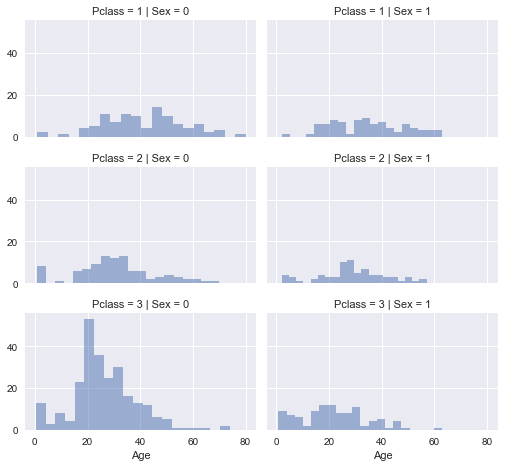

In [198]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [199]:
est_ages = np.zeros((2,3))

for dataset in train_and_test_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            est_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = est_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


Now that we've filled in all of our missing data using median values, we can sort all the ages into age group brackets and determine if there is a correlation with survival.

In [200]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], 5)
train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


Using the new AgeGroups that we've created, we can now group the actual ages into categories, where
0 is ages < 16, 1 is ages 17 - 32, 2 is ages 33 - 48, and 3 is ages 49 - 64. 

After we change the ages to an ordinal feature, we can remove the AgeGroup feature.

In [201]:
for dataset in train_and_test_df:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_df = train_df.drop(['AgeGroup'], axis=1)
train_and_test_df = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0
3,1,1,1,2,1,0,53.1000,S,3.0
4,0,3,0,2,0,0,8.0500,S,1.0


### Creating a new feature from SibSp, ParCh, Age, and Pclass

As mentioned before, we can create a Family feature that uses both SibSp and ParCh, that way we can discard the two features. The goal of this is to create a new feature that will be able to demonstrate a correlation of Family to Survival. By determining if one was with a Family or not, we can then see its correlation to whether they had a better chance of surviving.

In [202]:
for dataset in train_and_test_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


By creating a feature that determined the different sizes of family against their survival helps somewhat, but does not help very much when determining a direct correlation. 

Due to this, we can create another feature based off of this where we can check survival based on if an individual was alone or not so that we can see a better correlation.

In [203]:
for dataset in train_and_test_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We can now see that by being alone, individuals would have had a 20% less chance of survival as compared to if they were with atleast one other person. 

We can use this feature in our overall data and drop ParCh and SibSp, as this is a direct correlation to survival. 

In [204]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
train_and_test_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,3.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,3.0,0
4,0,3,0,2,8.0500,S,1.0,1


We can also combine Age and Pclass to create a unique feature that represents a combination of the two that can be used to test against survival later on in our models.

In [205]:
for dataset in train_and_test_df:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


### Embarked vs Survival

To determine if the port at which a passenger embarked from has a correlation to survival, we must first complete the Embarked feature, as there are missing values. 

We can do this by determining the most common port that passengers embark from and assume the missing values can be replaced with the found value

In [206]:
common = train_df.Embarked.dropna().mode()[0]
common

'S'

As shown, the port 'S' is the most common port to have embarked from, and as such we can fill in the mising Embarked values with 'S'.

In [207]:
for dataset in train_and_test_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


There is no clear correlation yet of how Embarked correlates with survival, but the filling in the missing values of Embarked will ensure no gaps in data.

### Converting Embarked feature to numerical

Since Embarked is still categorical, we want to change this feature to be numerical as well, where 0 is S, 1 is C, and 2 is Q.

In [208]:
for dataset in train_and_test_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,1,3.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,3.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


### Cleaning up Fare feature

We want to fill in any missing data from Fare and make sure it represents currency accurately. Along with this, in order to model the Fare properly we can also organize Fare into groups just like how we did so for Age.

In [209]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


Just like in previous categorical features, we now want to convert the Fare feature's values in both the train and test sets into ordinal values using the FareGroup feature.

In [210]:
for dataset in train_and_test_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareGroup'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1.0,0,3
1,1,1,1,2,3,1,3.0,0,2
2,1,3,1,1,1,0,2.0,1,3
3,1,1,1,2,3,0,3.0,0,2
4,0,3,0,2,1,0,1.0,1,6


In [211]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3


# Creating the model

Now that we have all of our data prepared, we can create a model and use it to predict the solution. Since we want to identify the relationship between survival and several features such as Age, Gender, and Pclass, we can use several models to compare results and pick the best model algorithm.

For this tutorial, we will be using the following algorithms:

- K-Nearest Neighbors (KNN)
- Decision Trees
- Random Forest
- Logistic Regression
- Support Vector Machines

Note: These algorithms can be found with detailed explanations on Wikipedia and will be linked accordingly

To begin, we will first need to create the training data.

In [212]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

## K-Nearest Neighbors

The K-Nearest Neighbors Algorithm is a non-parametric method used for classification and regression.

- In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

Click [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) for more information on KNN

In [213]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

83.95


## Decision Trees

A Decision Tree model algorithm uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

Click [here](https://en.wikipedia.org/wiki/Decision_tree_learning) for more information on Decision Trees

In [214]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

86.76


## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Click [here](https://en.wikipedia.org/wiki/Random_forest) for more information on Random Forest

In [215]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

86.76


## Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Click [here](https://en.wikipedia.org/wiki/Logistic_regression) for more information on Logistic Regression


In [216]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

81.37


## Support Vector Machines

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

Click [here](https://en.wikipedia.org/wiki/Support_vector_machine) for more information on Support Vector Machines

In [217]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

83.95


## Ranking Algorithms

Now that we have fitted all of our data to each model algorithm, we can compare the results to see which model has the best overall fit for the relationship we are trying to determine.

In [218]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
4,Decision Tree,86.76
0,Support Vector Machines,83.95
1,KNN,83.95
2,Logistic Regression,81.37


We can see that Random Forest and Decision Tree scored the same. Between the two, Random Forest is the better model to go with as they account for overfitting in the training sets whereas Decision Trees often overfit their training sets.